In [31]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Libraries
import warnings
warnings.filterwarnings('ignore')

# Import scikit learn libraries for machine learning model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/Churn_Modelling.csv')

# Shuffle the dataset randomly (frac=1 means return all rows)
df.sample(frac = 1)
# Display the first 5 rows of the DataFrame to get an overview of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking Information about Dataset

In [33]:
# Display concise information about the DataFrame, including data types and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking Null Values

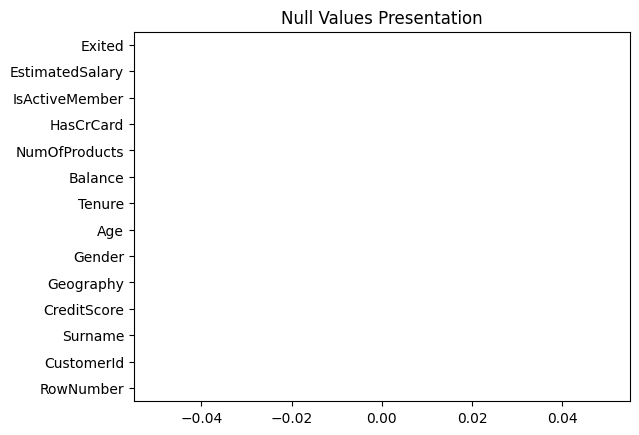

In [34]:
# Checking Null Values present in dataset and visualize them using a horizontal bar plot
df.isnull().sum().plot(kind = 'barh')
plt.title('Null Values Presentation') # Set the title of the plot
plt.show() # Display the plot


In [35]:
# Display descriptive statistics for the numerical columns in the DataFrame
print(df.describe())


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [36]:
# Segregate Numerical columns and Categorical columns based on their data types
numerical_col = df.select_dtypes(exclude = 'object')
categorical_col = df.select_dtypes(include = 'object')


In [37]:
# EDA (Exploratory Data Analysis) - Calculate and display various statistics for numerical columns

from collections import OrderedDict

stats = []

# Iterate through each numerical column
for i in numerical_col.columns:
  # Create an ordered dictionary to store statistics for the current column
  numerical_stats = OrderedDict({
      'Feature':i,
      'Count':df[i].count(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Maximum':df[i].max(),
      'Minimum':df[i].min(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
      'Standard Deviation': df[i].std(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurtosis()

  })
  stats.append(numerical_stats) # Append the statistics dictionary to the list
  report = pd.DataFrame(stats) # Create a DataFrame from the list of statistics

report # Display the DataFrame containing the statistics


,Feature,Count,Mean,Median,Maximum,Minimum,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,RowNumber,10000,5.000500e+03,5.000500e+03,10000.00,1.00,2500.75,7.500250e+03,4999.5000,2886.895680,0.000000,-1.200000
1,CustomerId,10000,1.569094e+07,1.569074e+07,15815690.00,15565701.00,15628528.25,1.575323e+07,124705.5000,71936.186123,0.001149,-1.196113
2,CreditScore,10000,6.505288e+02,6.520000e+02,850.00,350.00,584.00,7.180000e+02,134.0000,96.653299,-0.071607,-0.425726
3,Age,10000,3.892180e+01,3.700000e+01,92.00,18.00,32.00,4.400000e+01,12.0000,10.487806,1.011320,1.395347
4,Tenure,10000,5.012800e+00,5.000000e+00,10.00,0.00,3.00,7.000000e+00,4.0000,2.892174,0.010991,-1.165225
5,Balance,10000,7.648589e+04,9.719854e+04,250898.09,0.00,0.00,1.276442e+05,127644.2400,62397.405202,-0.141109,-1.489412
6,NumOfProducts,10000,1.530200e+00,1.000000e+00,4.00,1.00,1.00,2.000000e+00,1.0000,0.581654,0.745568,0.582981
7,HasCrCard,10000,7.055000e-01,1.000000e+00,1.00,0.00,0.00,1.000000e+00,1.0000,0.455840,-0.901812,-1.186973
8,IsActiveMember,10000,5.151000e-01,1.000000e+00,1.00,0.00,0.00,1.000000e+00,1.0000,0.499797,-0.060437,-1.996747
9,EstimatedSalary,10000,1.000902e+05,1.001939e+05,199992.48,11.58,51002.11,1.493882e+05,98386.1375,57510.492818,0.002085,-1.181518


In [38]:
# Remove irrelevant columns that are not needed for modeling
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [39]:
# Display the column names of the categorical columns DataFrame
categorical_col.columns


Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [40]:
# DATA ENCODING USING LABEL ENCODER - Convert categorical features into numerical ones

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encoding all Categorical columns using Label Encoder: Independent columns
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])


In [41]:
# Display a random sample of 5 rows from the DataFrame after encoding
df.sample(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9124,608,0,1,37,5,146093.39,2,0,0,160593.41,0
830,684,0,0,34,6,0.00,2,1,1,130928.22,0
863,717,0,1,53,6,0.00,2,0,1,97614.87,0
3000,532,0,0,40,5,0.00,2,0,1,177099.71,0
6146,738,2,0,33,3,122134.40,2,0,1,27867.59,0


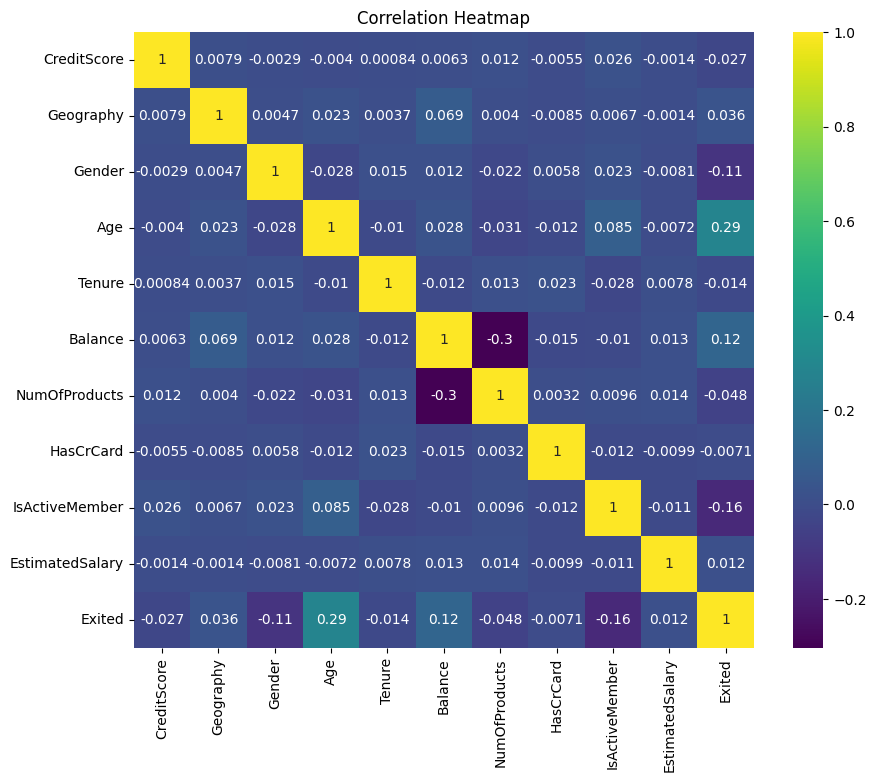

In [42]:
# Visualization - Create a heatmap to visualize the correlation matrix of the DataFrame
plt.figure(figsize=(10,8)) # Set the size of the figure
sns.heatmap(df.corr(), annot=True, cmap='viridis') # Create the heatmap with annotations and viridis colormap
plt.title('Correlation Heatmap') # Set the title of the heatmap
plt.show() # Display the heatmap


In [43]:
# Get the names of the numerical columns in the DataFrame
num_cols = df.select_dtypes(include=[np.number]).columns
print(num_cols)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


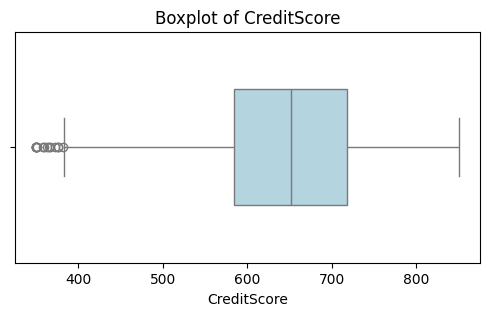

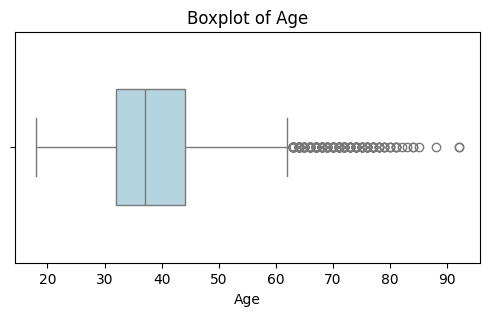

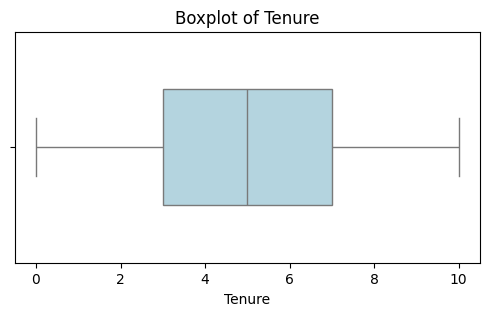

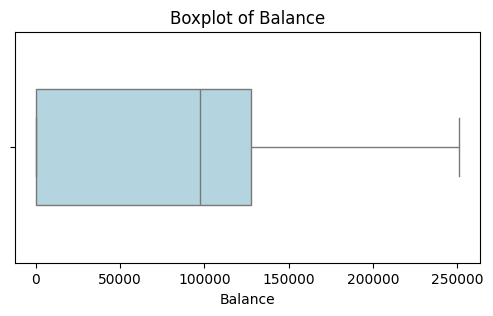

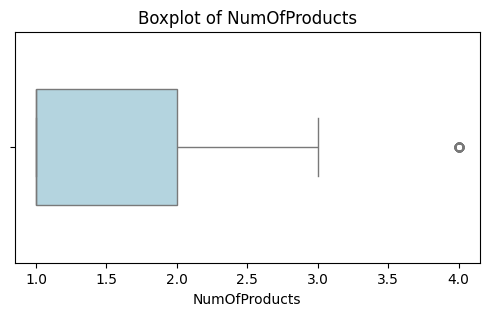

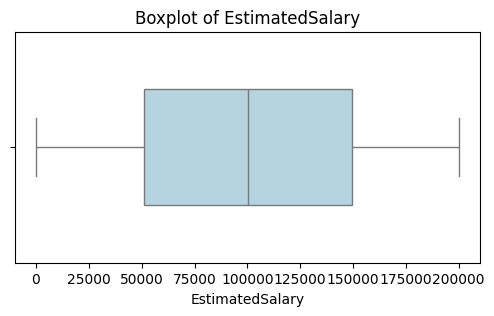

In [44]:
# Create boxplots for selected numerical columns to visualize their distribution and identify outliers
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Iterate through each selected numerical column
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='lightblue', width=0.5)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [45]:
# Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR) for the 'Balance' column
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in the 'Balance' column using the IQR method
outliers = df[(df['Balance'] < (Q1 - 1.5 * IQR)) | (df['Balance'] > (Q3 + 1.5 * IQR))]
# Print the number of outliers found in the 'Balance' column
print(f"Number of outliers in Balance: {len(outliers)}")


Number of outliers in Balance: 0


In [46]:
# Get the value counts for the 'Exited' column to see the distribution of the target variable
df['Exited'].value_counts()


,count
Exited,
0,7963
1,2037


In [47]:
# Separate the features (X) and the target variable (y)
X = df.drop(columns=['Exited'],axis = 1)
y = df['Exited']


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [49]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data to handle class imbalance
sampling = SMOTE()
X_train, y_train = sampling.fit_resample(X_train, y_train)


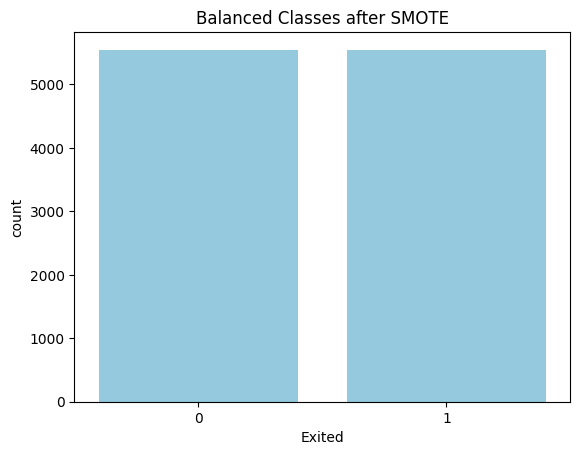

In [50]:
# Visualize the distribution of the target variable in the training set after applying SMOTE
sns.countplot(x=y_train, color='skyblue')
plt.title('Balanced Classes after SMOTE')
plt.show()


In [51]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [52]:
# Train a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [53]:

# Make predictions on the test set using the trained Random Forest model
y_pred = rf.predict(X_test)
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Print the classification report which includes precision, recall, and f1-score
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix to evaluate the performance of a classification model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8176666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      2416
           1       0.53      0.63      0.57       584

    accuracy                           0.82      3000
   macro avg       0.72      0.75      0.73      3000
weighted avg       0.83      0.82      0.82      3000

Confusion Matrix:
 [[2084  332]
 [ 215  369]]


In [54]:
# Train a Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.7266666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      2416
           1       0.37      0.57      0.45       584

    accuracy                           0.73      3000
   macro avg       0.62      0.67      0.63      3000
weighted avg       0.78      0.73      0.75      3000



In [55]:
# Train a DecisionTreeClassifier model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.747
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      2416
           1       0.40      0.61      0.48       584

    accuracy                           0.75      3000
   macro avg       0.65      0.69      0.66      3000
weighted avg       0.80      0.75      0.76      3000



In [ ]:
# Define the parameter distribution for RandomizedSearchCV for hyperparameter tuning of the RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300,500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [58]:
# Perform Randomized Search Cross-Validation to find the best hyperparameters for the RandomForestClassifier
rscv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=15,
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rscv.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   random_state=42, verbose=2)

In [60]:
# Get the best model found by RandomizedSearchCV
best_model = rscv.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)
print("Best Parameters:", rscv.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}
Test Accuracy: 0.813


In [62]:
# Calculate the mean cross-validation score from the RandomizedSearchCV results
mean_cv_score = rscv.cv_results_['mean_test_score'].mean()
# Print the mean cross-validation score
print(f"Mean Cross-Validation Score: {mean_cv_score}")


Mean Cross-Validation Score: 0.850295599476844
